In [8]:
import os
import cv2
import copy
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import SimpleITK as sitk
import SimpleITK as stk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import measure

In [1]:
root = "/Users/STUFF/lungnode/"

In [ ]:
subset = 9
file_list = glob(root+f"subset{subset}/*.mhd")
annotations_df = pd.read_csv("/Users/STUFF/lungnode/annotations.csv")
print("Files Count:",len(file_list))
print("DF Count:",len(annotations_df))
annotations_df.head()

Files Count: 88
DF Count: 1186


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


This script processes a specific subset of medical imaging data (subset9) by loading .mhd files and reading annotations from a CSV file. It prints the counts of files and annotation records for verification.

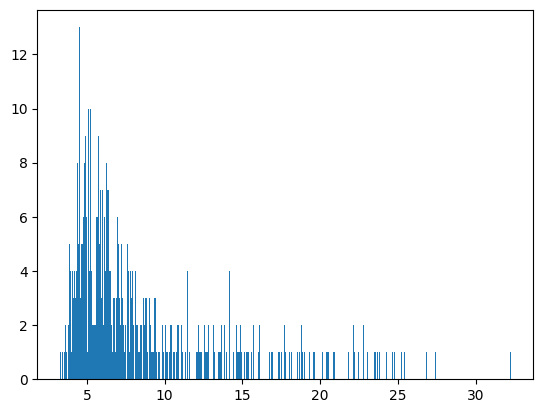

In [11]:
d = annotations_df['diameter_mm'].values
fig = plt.hist(d, bins=1185)

This script generates a histogram to visualize the distribution of lung nodule diameters (`diameter_mm`) from the annotations dataset. It uses 1185 bins for detailed granularity.

In [12]:
def get_filename(file_list, file):
    for f in file_list:
        if file in f:
            return f

In [13]:
annotations_df["filename"] = annotations_df["seriesuid"].map(lambda file: get_filename(file_list, file))
annotations_df = annotations_df.dropna()
annotations_df = annotations_df[annotations_df['diameter_mm']>=3.9]     
print(len(annotations_df))

100


This script maps filenames to annotations using the `seriesuid`, filters out invalid entries, and retains annotations where `diameter_mm` is at least 3.9 mm. It then prints the count of remaining annotations.

In [14]:
annotations_df.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm,filename
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,105.055792,19.825260,-91.247251,21.089619,/Users/STUFF/lungnode/subset9/1.3.6.1.4.1.1451...
36,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-65.870136,50.730440,-90.803304,5.915845,/Users/STUFF/lungnode/subset9/1.3.6.1.4.1.1451...
37,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-105.917119,-17.656588,-105.091752,5.484679,/Users/STUFF/lungnode/subset9/1.3.6.1.4.1.1451...
38,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,42.296133,56.151735,-84.661662,6.477966,/Users/STUFF/lungnode/subset9/1.3.6.1.4.1.1451...
39,1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295...,-137.500567,-21.653604,-152.036638,4.362886,/Users/STUFF/lungnode/subset9/1.3.6.1.4.1.1451...
